In [17]:
import numpy as np
import pandas as pd

In [18]:
dataset=pd.read_csv('abalone.csv')

In [19]:
dataset.columns

Index(['M', '0.455', '0.365', '0.095', '0.514', '0.2245', '0.101', '0.15',
       '15'],
      dtype='object')

In [20]:
names=['sex','length','diameter','height','whole_weight','weight_of_flesh','viscera_weight','shell_weight','rings']

In [21]:
dataset.columns=names

In [22]:
dataset.columns

Index(['sex', 'length', 'diameter', 'height', 'whole_weight',
       'weight_of_flesh', 'viscera_weight', 'shell_weight', 'rings'],
      dtype='object')

In [23]:
dataset[:4]


,sex,length,diameter,height,whole_weight,weight_of_flesh,viscera_weight,shell_weight,rings
0,M,0.35,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.53,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.44,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.33,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [26]:
x=dataset.drop(['rings','sex'],axis=1)

In [27]:
x.dtypes

length             float64
diameter           float64
height             float64
whole_weight       float64
weight_of_flesh    float64
viscera_weight     float64
shell_weight       float64
dtype: object

In [28]:
x[:2]

,length,diameter,height,whole_weight,weight_of_flesh,viscera_weight,shell_weight
0,0.35,0.265,0.090,0.2255,0.0995,0.0485,0.07
1,0.53,0.420,0.135,0.6770,0.2565,0.1415,0.21


In [29]:
y=dataset['rings']

In [30]:
y[:5]

0     7
1     9
2    10
3     7
4     8
Name: rings, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=100)

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
knn=KNeighborsClassifier(n_neighbors=2)

In [35]:
knn.fit(train_x,train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [36]:
pred_test=knn.predict(test_x)

In [37]:
pred_test[:2]

array([11, 10], dtype=int64)

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
acc=accuracy_score(test_y,pred_test)

In [40]:
acc

0.2021531100478469

In [41]:
pred_train=knn.predict(train_x)

In [42]:
acc=accuracy_score(train_y,pred_train)

In [43]:
acc

0.5964071856287425

In [44]:
test_acc=[]
train_acc=[]
def build_model(k):
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(train_x,train_y)
    pred_test=model.predict(test_x)
    pred_train=model.predict(train_x)
    acc_test=accuracy_score(test_y,pred_test)
    acc_train=accuracy_score(train_y,pred_train)
    return acc_test,acc_train

In [45]:
for i in[2,3,4,5,6]:
    p,q=build_model(i)
    test_acc.append(p)
    train_acc.append(q)

In [46]:
test_acc

[0.2021531100478469,
 0.1901913875598086,
 0.20933014354066987,
 0.21052631578947367,
 0.21889952153110048]

In [47]:
train_acc

[0.5964071856287425,
 0.5236526946107785,
 0.49191616766467067,
 0.45808383233532934,
 0.429940119760479]

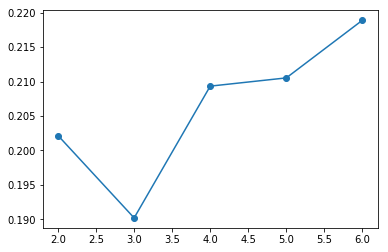

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline
k=[2,3,4,5,6]
plt.plot(k,test_acc,'o-')

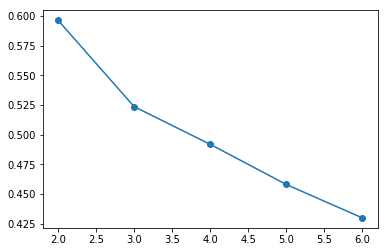

In [49]:
plt.plot(k,train_acc,'o-')

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:

lr=LogisticRegression()

In [52]:

lr.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [53]:

pred_test=lr.predict(test_x)

In [54]:

from sklearn.metrics import accuracy_score

In [55]:

acc=accuracy_score(test_y,pred_test)

In [56]:
acc

0.20933014354066987

In [57]:
pred_train=lr.predict(train_x)

In [58]:
acc=accuracy_score(train_y,pred_train)

In [59]:
acc

0.2508982035928144

In [60]:
from sklearn.svm import SVC

In [61]:

svc=SVC()

In [62]:
svc.fit(train_x,train_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [63]:

pred_test=svc.predict(test_x)

In [64]:
pred_train=svc.predict(train_x)

In [65]:
acc=accuracy_score(train_y,pred_train)

In [66]:
acc

0.24520958083832337

In [67]:
acc=accuracy_score(test_y,pred_test)

In [68]:
acc

0.21291866028708134

In [69]:
from sklearn.ensemble import VotingClassifier

C:\Users\gupta\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [88]:
from sklearn import model_selection
kfold=model_selection.KFold(n_splits=4,random_state=100)

In [89]:

estimator=[]

In [90]:
model1=LogisticRegression()
estimator.append(('logistic',model1))

In [91]:
model2=SVC()
estimator.append(('svm',model2))

In [92]:
model3=KNeighborsClassifier()
estimator.append(('knn',model3))

In [93]:
ensemble=VotingClassifier(estimator)

In [94]:
from sklearn import model_selection
result=model_selection.cross_val_score(ensemble,x,y,cv=kfold)

C:\Users\gupta\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\gupta\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\gupta\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\gupta\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

In [95]:
result

array([0.14846743, 0.36398467, 0.23467433, 0.23371648])